In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os

def load_data(models, hyperparams, dir_root="auto_experiments", eps=245, freq=20480):
    results = np.zeros((len(models), eps, 16))
    for n in range(len(models)):
        dir_exp = "%s_%s" % (models[n], hyperparams)
        for ep in range(eps):
            index = freq*ep
            dir_result = os.path.join(dir_root, dir_exp, "eval", "train_%d" % (index))
            bank_cash = np.load(os.path.join(dir_result, "tot_bank_cash_over_time.npy"))
            tpr = np.load(os.path.join(dir_result, "tot_tpr.npy"))
            tp = np.load(os.path.join(dir_result, "tot_tp.npy"))
            fn = np.load(os.path.join(dir_result, "tot_fn.npy"))
            rewards = np.load(os.path.join(dir_result, "rewards.npy"))
            bias = np.load(os.path.join(dir_result, "bias.npy"))
            results[n, ep, 0] = index
            results[n, ep, 1] = bank_cash[:, -1].mean()
            results[n, ep, 2] = bank_cash[:, -1].min()
            results[n, ep, 3] = bank_cash[:, -1].max()        
            results[n, ep, 4:6] = np.divide(tp.mean(axis=0), tp.mean(axis=0)+fn.mean(axis=0))
            results[n, ep, 6:8] = tpr.min(axis=0)
            results[n, ep, 8:10] = tpr.max(axis=0)
            results[n, ep, 10] = np.abs(results[n, ep, 4]-results[n, ep, 5])
            results[n, ep, 11] = rewards.mean()
            results[n, ep, 12] = rewards.min()
            results[n, ep, 13] = rewards.max()
            results[n, ep, 14] = bias
    return results

def collect_data(model, hyperparam, dir_root, seeds, timesteps=245, freq=20480):
    results = np.zeros(seeds, timesteps, 3)
    for timestep in range(timesteps):
        index = freq*timestep
        for seed in range(seeds):
            dir_exp = "%s_%s_%d" % (model, hyperparam, seed)
            dir_result = os.path.join(dir_root, dir_exp, "eval", "train_%d" % (index))
            rewards = np.load(os.path.join(dir_result, "rewards.npy"))
            bias = np.load(os.path.join(dir_result, "bias.npy"))
            results[seed, timestep, 0] = index
            results[seed, timestep, 1] = rewards.mean()
            results[seed, timestep, 2] = bias


# def update_data(models, hyperparams, dir_root="auto_experiments", eps=245, freq=20480):
#     results = np.zeros((len(models), eps, 16))
#     for n in range(len(models)):
#         dir_exp = "%s_%s" % (models[n], hyperparams)
#         for ep in range(eps):
#             index = freq*ep
#             dir_result = os.path.join(dir_root, dir_exp, "eval", "train_%d" % (index))
#             bank_cash = np.load(os.path.join(dir_result, "tot_bank_cash_over_time.npy"))
#             tpr = np.load(os.path.join(dir_result, "tot_tpr.npy"))
#             tp = np.load(os.path.join(dir_result, "tot_tp.npy"))
#             fn = np.load(os.path.join(dir_result, "tot_fn.npy"))

#             ratio = np.divide(tp.mean(axis=0), tp.mean(axis=0)+fn.mean(axis=0))
#             rewards = bank_cash[:, -1]
#             bias = ratio.max(axis=0)-ratio.min(axis=0)
#             np.save(f'{dir_result}/rewards.npy', rewards)
#             np.save(f'{dir_result}/bias.npy', bias)

#     return 0

ppo_models = ["G-PPO", "R-PPO", "A-PPO"]
ppo_colors = ["purple", "red", "blue", "green", "gray"]

results_6_ori_0 = load_data(ppo_models, "1e-06_ori_0")
results_6_ori_1 = load_data(ppo_models, "1e-06_ori_1")

results_6_mod_0 = load_data(ppo_models, "1e-06_mod_0")
results_6_mod_1 = load_data(ppo_models, "1e-06_mod_1")

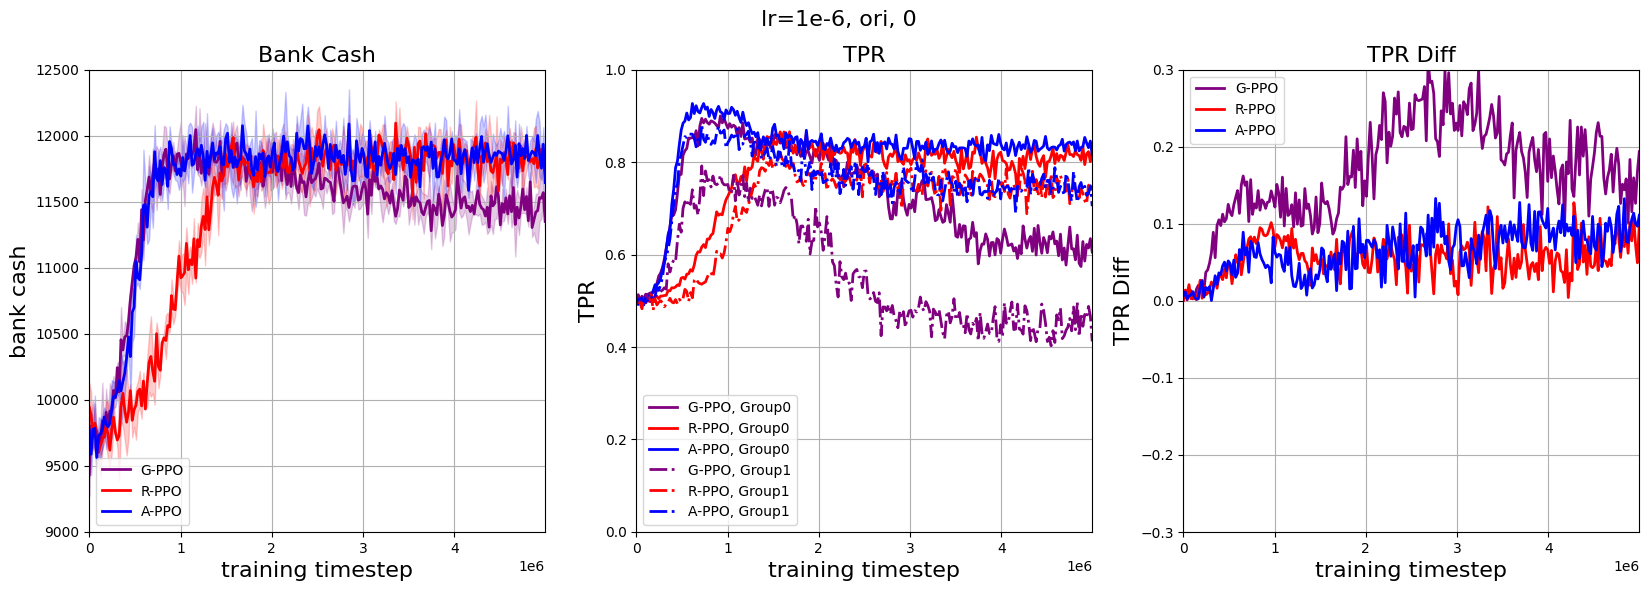

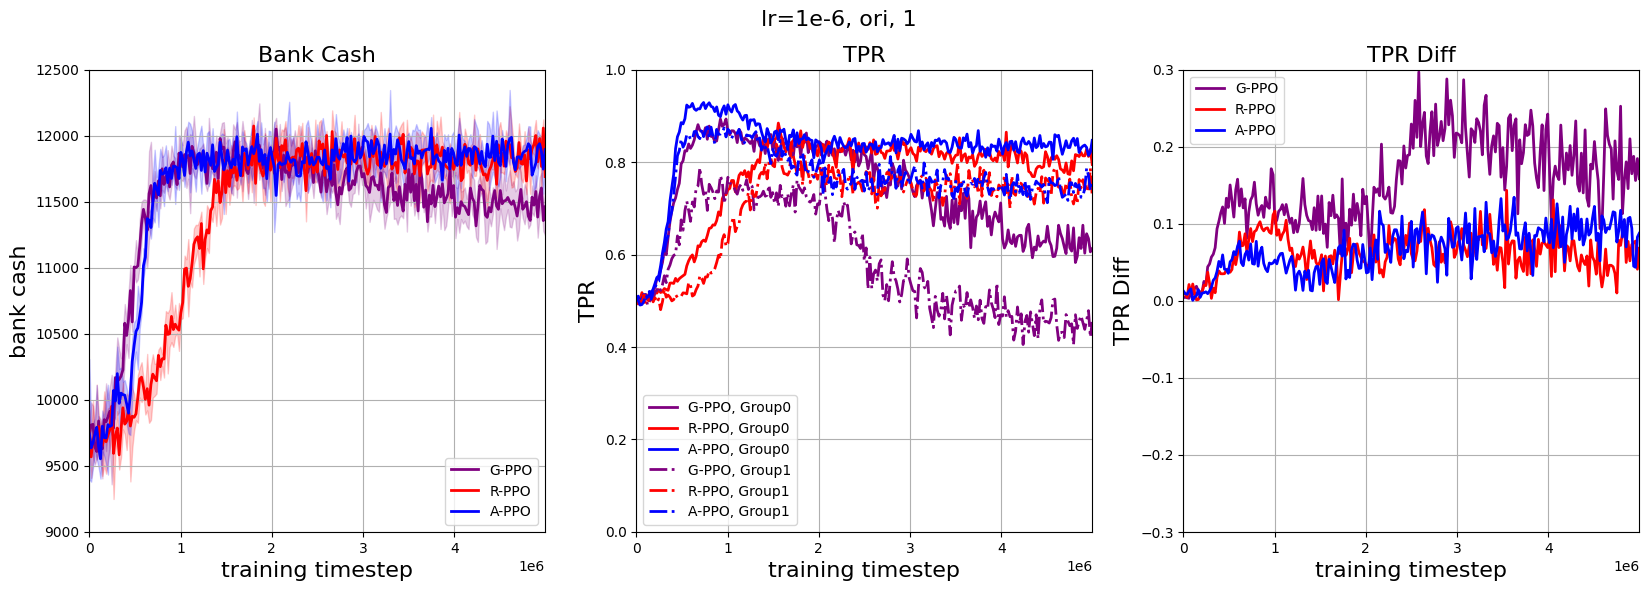

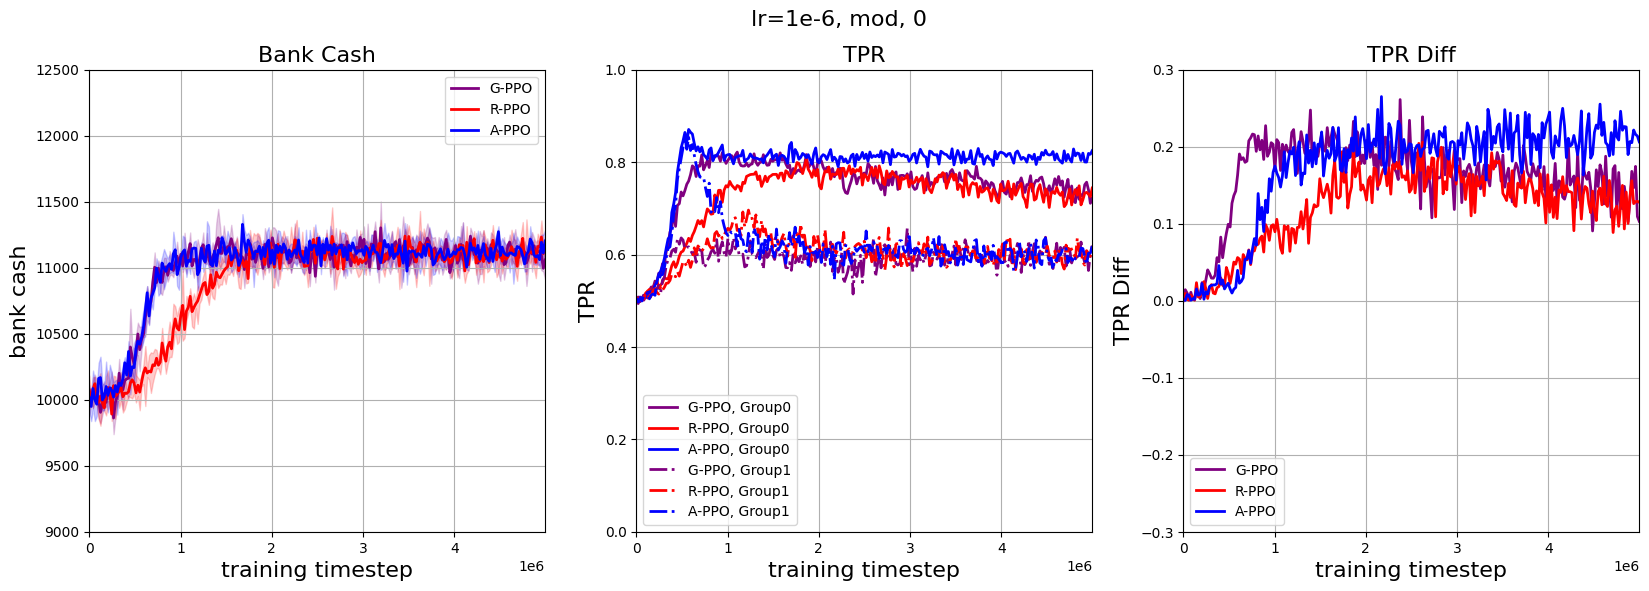

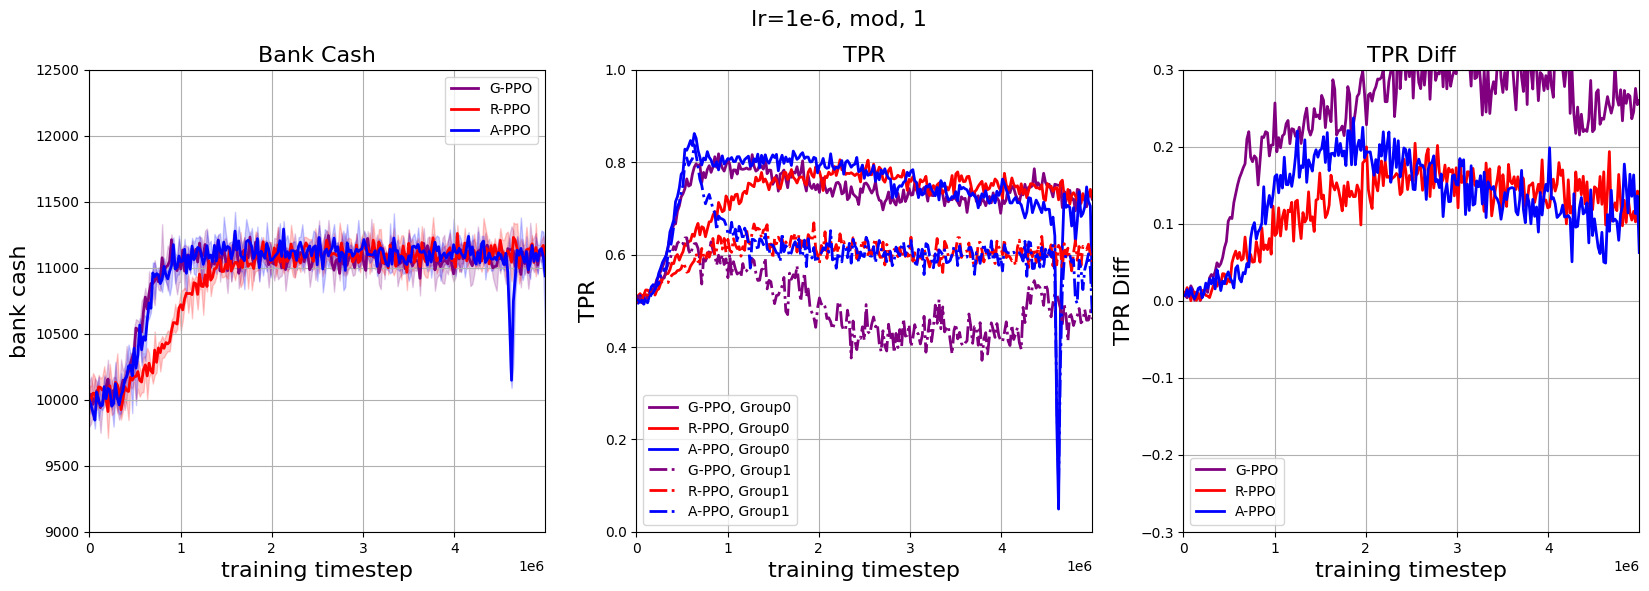

In [14]:
def plot_curves(models, results, colors, title, eps=245, freq=20480):
    width = (eps-1)*freq

    plt.figure(figsize=(20, 6))
    plt.suptitle(title, fontsize=16)
    
    plt.subplot(1, 3, 1)
    plt.title("Bank Cash", fontsize=16)
    for n in range(len(models)):
        plt.plot(results[n, :, 0], results[n, :, 11], linewidth=2, c=colors[n])
    for n in range(len(models)):
        plt.fill_between(results[n, :, 0], results[n, :, 12],results[n, :, 13], color=colors[n], alpha=0.2)
    plt.xlim((0, width))
    plt.ylim((9000, 12500))
    plt.grid()
    plt.legend(models)
    plt.ylabel('bank cash', fontsize=16)
    plt.xlabel('training timestep', fontsize=16)

    plt.subplot(1, 3, 2)
    plt.title("TPR", fontsize=16)
    for n in range(len(models)):
        plt.plot(results[n, :, 0], results[n, :, 4], linewidth=2, linestyle='-', c=colors[n], label=models[n]+', Group0')
    #plt.fill_between(results[:, 0], results[:, 6], results[:, 8], color='red', alpha=0.2)
    for n in range(len(models)):
        plt.plot(results[n, :, 0], results[n, :, 5], linewidth=2, linestyle='-.', c=colors[n], label=models[n]+', Group1')
    #plt.fill_between(results[:, 0], results[:, 7], results[:, 9], color='blue', alpha=0.2)
    plt.legend()
    plt.xlim((0, width))
    plt.ylim((0, 1))
    plt.grid()
    plt.ylabel('TPR', fontsize=16)
    plt.xlabel('training timestep', fontsize=16)

    plt.subplot(1, 3, 3)
    plt.title("TPR Diff", fontsize=16)
    for n in range(len(models)):
        plt.plot(results[n, :, 0], results[n, :, 14], linewidth=2, c=colors[n])
    plt.xlim((0, width))
    plt.ylim((-0.3, 0.3))
    plt.grid()
    plt.legend(models)
    plt.ylabel('TPR Diff', fontsize=16)
    plt.xlabel('training timestep', fontsize=16)

plot_curves(ppo_models, results_6_ori_0, ppo_colors, "lr=1e-6, ori, 0")
plot_curves(ppo_models, results_6_ori_1, ppo_colors, "lr=1e-6, ori, 1")

plot_curves(ppo_models, results_6_mod_0, ppo_colors, "lr=1e-6, mod, 0")
plot_curves(ppo_models, results_6_mod_1, ppo_colors, "lr=1e-6, mod, 1")

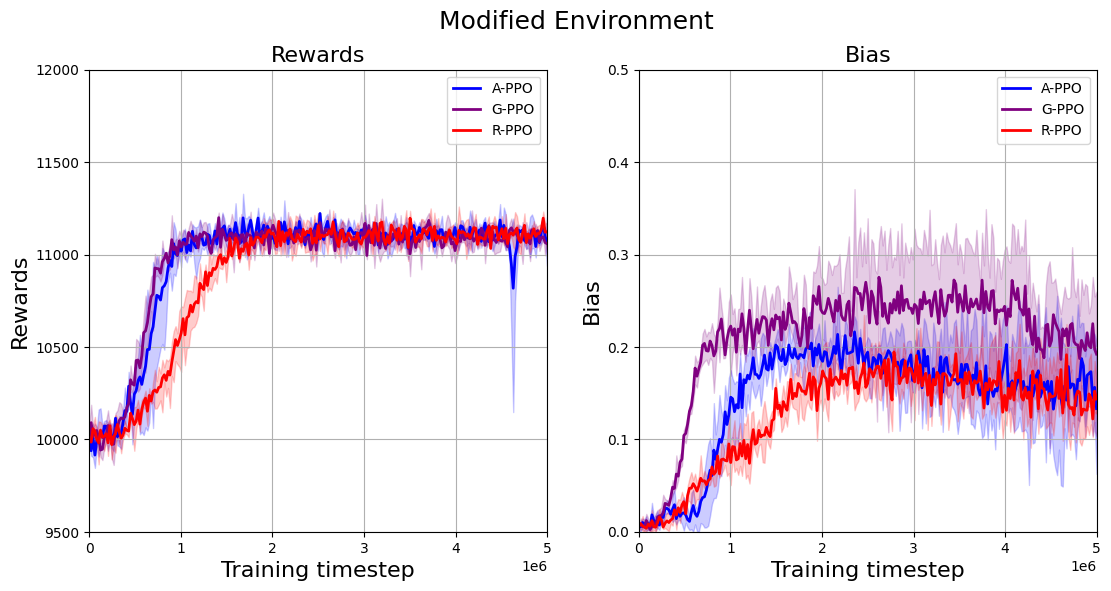

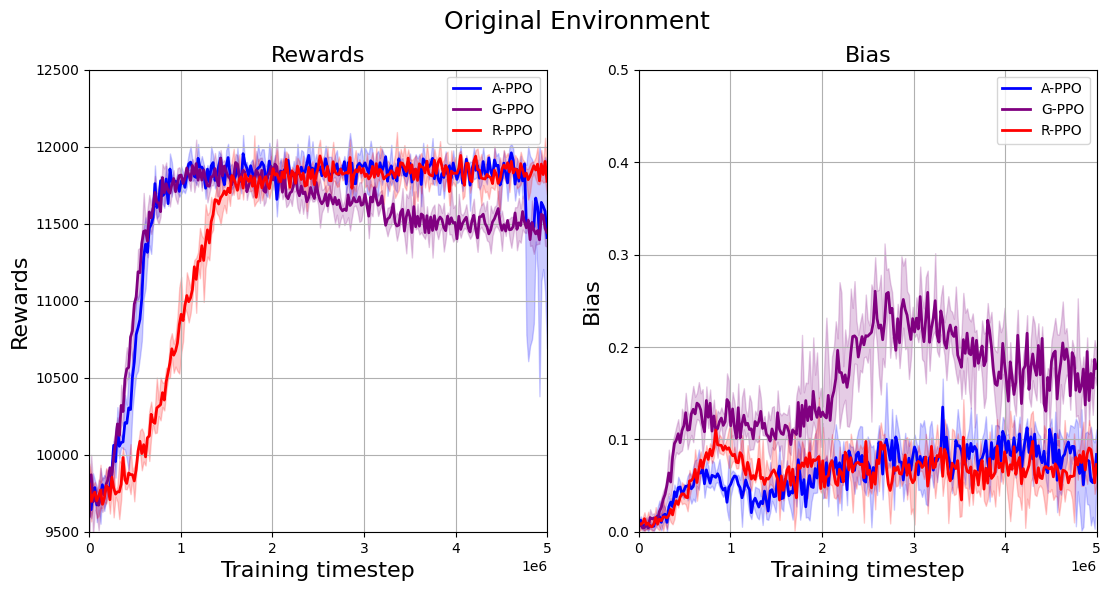

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

def load_and_plot(model_path_dict, model_color_dict, title, reward_low=9500, reward_high=12000):
    fig = plt.figure(figsize=(13, 6))
    fig.suptitle(title, fontsize=18)

    plt1 = fig.add_subplot(1, 2, 1)
    plt1.set_title("Rewards", fontsize=16)
    plt1.set_ylabel('Rewards', fontsize=16)
    plt1.set_xlabel('Training timestep', fontsize=16)

    plt2 = fig.add_subplot(1, 2, 2)
    plt2.set_title("Bias", fontsize=16)
    plt2.set_ylabel('Bias', fontsize=16)
    plt2.set_xlabel('Training timestep', fontsize=16)

    for model in model_path_dict.keys():
        data = np.load(model_path_dict[model])

        indexes = data[:, :, 0]
        rewards = data[:, :, 1]
        bias = data[:, :, 2]
        rewards = gaussian_filter1d(rewards, sigma=2)
        bias = gaussian_filter1d(bias, sigma=2)
        plt1.plot(indexes[0], rewards.mean(axis=0), linewidth=2, c=model_color_dict[model], label=model)
        plt1.fill_between(indexes[0], rewards.min(axis=0), rewards.max(axis=0), color=model_color_dict[model], alpha=0.2)
        plt2.plot(indexes[0], bias.mean(axis=0), linewidth=2, c=model_color_dict[model], label=model)
        plt2.fill_between(indexes[0], bias.min(axis=0), bias.max(axis=0), color=model_color_dict[model], alpha=0.2)

    plt1.set_ylim((reward_low, reward_high))
    plt1.set_xlim((0, 5e6))
    plt1.grid()
    plt1.legend()

    plt2.set_ylim((0, 0.5))
    plt2.set_xlim((0, 5e6))
    plt2.grid()
    plt2.legend()

mod_model_path_dict = {
    "A-PPO":"results/A-PPO_1e-06_mod.npy",
    "G-PPO":"results/G-PPO_1e-06_mod.npy",
    "R-PPO":"results/R-PPO_1e-06_mod.npy",
}

ori_model_path_dict = {
    "A-PPO":"results/A-PPO_1e-06_ori.npy",
    "G-PPO":"results/G-PPO_1e-06_ori.npy",
    "R-PPO":"results/R-PPO_1e-06_ori.npy",
}

model_color_dict = {
    "A-PPO":"blue",
    "G-PPO":"purple",
    "R-PPO":"red",
}

load_and_plot(mod_model_path_dict, model_color_dict, "Modified Environment", 9500, 12000)
load_and_plot(ori_model_path_dict, model_color_dict, "Original Environment", 9500, 12500)